In [1]:
def write_answer(number, answr):
    with open(f"answer{number}.txt", "w") as fout:
        fout.write(str(answr))

# Задание по программированию: Бэггинг и случайный лес

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits). 

In [2]:
import sklearn.datasets as datasets
data, target = datasets.load_digits(return_X_y=True)

In [3]:
data.shape, target.shape

((1797, 64), (1797,))

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

1

In [5]:
dtc = DecisionTreeClassifier()
scores = cross_val_score(estimator = dtc, X = data, y = target, cv = 10)
print(scores)
print("Mean  = "+str(scores.mean()))

[0.80540541 0.86885246 0.82320442 0.83888889 0.7877095  0.89385475
 0.89385475 0.8258427  0.81920904 0.82954545]
Mean  = 0.8386367358336289


In [6]:
write_answer(1, scores.mean())

In [7]:
from sklearn.ensemble import BaggingClassifier

2

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [8]:
bc = BaggingClassifier(base_estimator=dtc, n_estimators = 100)
scores = cross_val_score(estimator = bc, X = data, y = target, cv = 10)
print(scores)
print("Mean  = "+str(scores.mean()))

[0.88108108 0.95628415 0.9281768  0.93333333 0.93296089 0.98882682
 0.96089385 0.92134831 0.87570621 0.92045455]
Mean  = 0.9299066001996351


In [9]:
write_answer(2, scores.mean())

3.

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на d\sqrt{d}d
​ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [10]:
d = int((data.shape[1])**0.5)
bc = BaggingClassifier(base_estimator=dtc, n_estimators = 100, max_features = d)
scores = cross_val_score(estimator = bc, X = data, y = target, cv = 10)
print(scores)
print("Mean  = "+str(scores.mean()))

[0.9027027  0.96721311 0.91160221 0.89444444 0.93854749 0.9273743
 0.96089385 0.96629213 0.89265537 0.92045455]
Mean  = 0.9282180161821743


In [11]:
write_answer(3, scores.mean())

4.

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же d\sqrt{d}d
​ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [12]:
dtc = DecisionTreeClassifier(max_features=d)
bc = BaggingClassifier(base_estimator=dtc, n_estimators = 100)
scores = cross_val_score(estimator = bc, X = data, y = target, cv = 10)
print(scores)
print("Mean  = "+str(scores.mean()))

[0.8972973  0.96174863 0.95027624 0.95       0.95530726 0.97765363
 0.96648045 0.95505618 0.94350282 0.9375    ]
Mean  = 0.9494822519687162


In [13]:
write_answer(4, scores.mean())

5

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

In [14]:
from sklearn.ensemble import RandomForestClassifier 

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import warnings
warnings.simplefilter("ignore")

In [17]:
import numpy as np
ns = np.arange(start = 5, stop = 101, step = 5)

In [18]:
score_results = []
for n in ns:
    rfc = RandomForestClassifier(n_estimators = n)
    scores = cross_val_score(estimator =rfc, X = data, y = target, cv = 10)
    score_results.append(scores.mean())

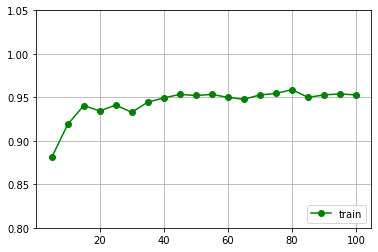

In [19]:
pylab.grid(True)
pylab.plot(ns, score_results, 'g-', marker='o', label='train')
pylab.ylim((0.8, 1.05))
pylab.legend(loc='lower right')

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

23

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.


6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [20]:
ns = np.arange(start = 5, stop = 61, step = 5)

score_results = []
for n in ns:
    rfc = RandomForestClassifier(n_estimators = 20, max_features = n)
    scores = cross_val_score(estimator =rfc, X = data, y = target, cv = 10)
    score_results.append(scores.mean())

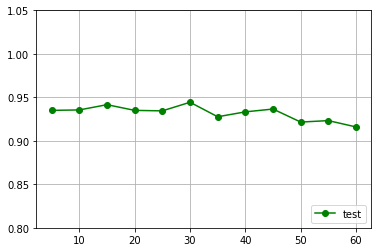

In [21]:
pylab.grid(True)
pylab.plot(ns, score_results, 'g-', marker='o', label='test')
pylab.ylim((0.8, 1.05))
pylab.legend(loc='lower right')

In [22]:
print(score_results)

[0.9350058620442196, 0.935518494654918, 0.941553561652035, 0.935001346263627, 0.9344469014568777, 0.9443414514400846, 0.9276769234696106, 0.9333004308373036, 0.9365433902442678, 0.9215664836599572, 0.9232382430461721, 0.9159690447891371]


4

In [23]:
ns = np.arange(start = 1, stop = 30, step = 1)

score_results = []
for n in ns:
    rfc = RandomForestClassifier(n_estimators = 20, max_features = 15, max_depth=n )
    scores = cross_val_score(estimator =rfc, X = data, y = target, cv = 10)
    score_results.append(scores.mean())

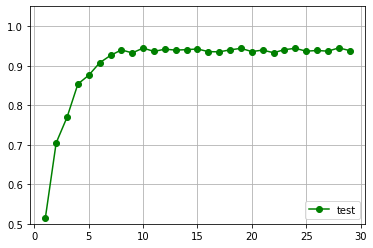

In [24]:
pylab.grid(True)
pylab.plot(ns, score_results, 'g-', marker='o', label='test')
pylab.ylim((0.5, 1.05))
pylab.legend(loc='lower right')

In [25]:
print(score_results)

[0.5137729041763025, 0.7046876338349729, 0.7695042805769612, 0.8535871278409074, 0.8758690322049001, 0.9072158156411625, 0.925857839741455, 0.9398824255185184, 0.9322778815111915, 0.9444362983760138, 0.9360329774526447, 0.9416229066385453, 0.9394015248262215, 0.9404660534989139, 0.9422078876419823, 0.9354746819618039, 0.9349270522112849, 0.9399227532760266, 0.9437907066527427, 0.9355909296798434, 0.9394034675566433, 0.9327412205529477, 0.9404571532680344, 0.943862988078495, 0.9366264400671588, 0.9383745831701577, 0.9366686055472963, 0.944911566952307, 0.9381449940531275]


7

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

In [26]:
write_answer(5,"2 3 4 7")